# ¡Llena ese carrito!

# Introducción

En este proyecto, haré un análisis de datos centrado en Instacart, una plataforma de entregas de comestibles similar a Uber Eats y Door Dash. 

Como parte de este proyecto, tengo tres pasos específicos que completar. Para cada uno de ellos, proporcionaré una breve introducción que refleje cómo pretendo abordar el paso respectivo, y redactaré párrafos explicativos que justifiquen mis decisiones durante el proceso. Finalmente, elaboraré una conclusión que sintetice mis hallazgos y las decisiones tomadas a lo largo del proyecto.

## Diccionario de datos

En esta sección, proporcionaré una descripción detallada de las cinco tablas que conforman nuestro conjunto de datos. Para llevar a cabo tanto el preprocesamiento como el análisis exploratorio de los datos, será necesario utilizar todas ellas. A continuación, presento el diccionario de datos correspondiente:

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

En esta etapa, procederé a leer los archivos de datos correspondientes utilizando la función pd.read_csv() y ajustando los parámetros necesarios para garantizar una lectura correcta de los datos. Posteriormente, verificaré la información contenida en cada DataFrame creado.


## Plan de solución


En primer lugar, leeré los datos de cada uno de los 5 archivos CSV para obtener una visión general de los datos. Esto incluirá el número de filas y columnas, los nombres de las columnas, los tipos de datos, los valores nulos y el uso de memoria. Luego, verificaré que la lectura se haya realizado correctamente utilizando el método head(), lo que me permitirá observar las primeras 5 filas de cada archivo.

In [2]:
# importar librerías

import pandas as pd

import matplotlib.pyplot as plt


In [3]:
# leer conjuntos de datos en los DataFrames

df_orders = pd.read_csv("instacart_orders.csv",sep=";")

df_products = pd.read_csv("products.csv",sep=";")

df_aisles = pd.read_csv("aisles.csv",sep=";")

df_departments = pd.read_csv("departments.csv",sep=";")

df_order_products = pd.read_csv("order_products.csv",sep=";")


In [4]:
# mostrar información del DataFrame df_orders

df_orders.info()

df_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [5]:
# mostrar información del DataFrame df_products

df_products.info()

df_products.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
# mostrar información del DataFrame df_aisles
df_aisles.info()

df_aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
# mostrar información del DataFrame df_departments
df_departments.info()

df_departments.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [8]:
# mostrar información del DataFrame df_order_products

df_order_products.info(show_counts=True)

df_order_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


## Conclusiones


Durante el Paso 1, al intentar cargar los datos utilizando exclusivamente la función read_csv() de Pandas, seguido de la revisión de la información de los archivos mediante el método info() y la inspección de las primeras 5 filas con el método head(), observé que los archivos no estaban correctamente separados. Esta situación se evidenció al notar que toda la información estaba ubicada en una sola columna, lo que dificultaba su interpretación y análisis. Como solución, tuve que volver a leer los archivos, esta vez ajustando el parámetro sep=';' para garantizar una correcta interpretación de los datos. Una vez realizada esta corrección y tras ejecutar nuevamente los métodos info() y head(), pude obtener un resumen detallado de los datos que concuerda con el diccionario de datos proporcionado al inicio del proyecto. Estas acciones resultaron fundamentales para asegurar la calidad de los datos y prepararlos adecuadamente para el siguiente paso del análisis.


# Paso 2. Preprocesamiento de los datos

En esta fase del proyecto, llevaré a cabo el preprocesamiento de los datos siguiendo los siguientes pasos:

1. Verificación y corrección de los tipos de datos: Revisaré los tipos de datos de todas las columnas para asegurarme de que estén en el formato correcto. En caso de encontrar inconsistencias, realizaré las conversiones necesarias, especialmente en aquellas columnas que representan identificadores (ID).

2. Identificación y manejo de valores ausentes: Identificaré los valores ausentes en el conjunto de datos y evaluaré la mejor estrategia para tratarlos. Utilizaré métodos como la imputación de valores o la eliminación de filas/columnas, según sea apropiado. Explicaré detalladamente qué tipo de valores ausentes encontré, cómo los traté y por qué elegí esos métodos.

3. Identificación y eliminación de valores duplicados: Detectaré los valores duplicados en el conjunto de datos y los eliminaré para evitar distorsiones en el análisis. Describiré los tipos de duplicados encontrados, cómo los identifiqué y eliminé, y proporcionaré una explicación sobre la posible presencia de duplicados en el conjunto de datos.

### `orders` data frame

In [9]:
# Revisar si hay pedidos duplicados

df_orders[df_orders.duplicated()]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


Se puede ver que todas las líneas duplicadas tienen como día en común el 3 (miércoles) a las 2 am

In [10]:
# Verificar todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_orders[(df_orders["order_hour_of_day"] == 2) & (df_orders["order_dow"] == 3)]



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


El resultado sugiere que todos los duplicados son del miércoles a las 2 am, puede que haya existido algún error del sistema que registra los datos a esa hora en ese día.

In [11]:
# Eliminar los pedidos duplicados

df_orders.drop_duplicates(inplace=True)




In [12]:
# Volver a verificar si hay filas duplicadas

df_orders[df_orders.duplicated()]

#Número de filas duplicadas

df_orders.duplicated().sum()


0

In [13]:
# Volver a verificar únicamente si hay IDs duplicados de pedidos

df_orders[df_orders["order_id"].duplicated()]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order



Pude evidenciar que todas las filas duplicadas  en el Data Frame de pedidos,eran del día míercoles a las 2 am porque probablemente ocurrió algún problema con el sistema de registro que hizo que algunos pedidos se duplicaran. Por esta razón, eliminé los duplicados con df_orders.drop_duplicates(inplace=True)

### `products` data frame

In [14]:
# Verificar si hay filas totalmente duplicadas

df_products[df_products.duplicated()]


,product_id,product_name,aisle_id,department_id


In [15]:
# Revisar únicamente si hay ID de departamentos duplicados

df_products[df_products["department_id"].duplicated()]


,product_id,product_name,aisle_id,department_id
4,5,Green Chile Anytime Sauce,5,13
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7
10,11,Peach Mango Juice,31,7
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [16]:
# Revisar únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

df_products["product_name"] = df_products["product_name"].str.upper()

df_products[df_products["product_name"].duplicated()]


,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [17]:
# Revisar si hay nombres duplicados de productos no faltantes

duplicates = df_products[df_products["product_name"].notna()]["product_name"].duplicated()

duplicates_df = df_products[df_products["product_name"].notna()][duplicates]

#Llamar a duplictates_df

duplicates_df


,product_id,product_name,aisle_id,department_id
2058,2059,BIOTIN 1000 MCG,47,11
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
5558,5559,CREAM OF MUSHROOM SOUP,69,15
7558,7559,CINNAMON ROLLS WITH ICING,105,13
9037,9038,AMERICAN CHEESE SLICES,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


No hay filas totalmente duplicadas en el DataFrame df_products. Sin embargo, se encontraron departamentos duplicados, lo cual es normal ya que puede haber varios productos en el mismo departamento. Al revisar los nombres duplicados de los productos, se observa que hay varios productos duplicados sin nombre, es decir, con un valor NaN, así como otros productos con nombres duplicados. Esto se puede corroborar al eliminar los productos duplicados sin nombre y observar que aún quedan duplicados con nombres de productos

### `departments` data frame

In [18]:
# Revisar si hay filas totalmente duplicadas
df_departments[df_departments.duplicated()]

,department_id,department


In [19]:
# Revisar únicamente si hay IDs duplicadas de departamentos

df_departments[df_departments["department_id"].duplicated()]

,department_id,department



No existen filas totalmente duplicadas en el DataFrame df_departments, y tampoco hay IDs duplicados de departamentos.

### `aisles` data frame

In [20]:
# Revisar si hay filas totalmente duplicadas

df_aisles[df_aisles.duplicated()]

,aisle_id,aisle


In [21]:
# Revisar únicamente si hay IDs duplicadas de cada categoría de pasillo de víveres 

df_aisles[df_aisles["aisle_id"].duplicated()]

,aisle_id,aisle




No existen filas totalmente duplicadas en el DataFrame df_aisles, y tampoco hay IDs duplicados para cada pasillo de víveres.

### `order_products` data frame

In [22]:
# Revisar si hay filas totalmente duplicadas

df_order_products[df_order_products.duplicated()]

,order_id,product_id,add_to_cart_order,reordered


In [23]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
df_order_products[df_order_products["order_id"].duplicated()]


,order_id,product_id,add_to_cart_order,reordered
367,2867619,48094,9.0,0
824,844425,39408,10.0,1
1124,3319857,37067,19.0,0
1258,1038788,12471,14.0,0
1303,2825714,44632,16.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


No existen filas totalmente duplicadas en el DataFrame df_order_products. Sin embargo, es importante tener en cuenta que sí existen duplicados en la columna "order_id", lo que sugiere que posiblemente hay órdenes que se registraron varias veces.



## Encontrar y eliminar los valores ausentes

Al trabajar con valores duplicados, pude observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [24]:
# Encontrar los valores ausentes en la columna 'product_name'

df_products[df_products["product_name"].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21




Observando la tabla resultante de los valores ausentes en la columna "product_name", se puede observar que los pedidos tienen en común que se asocian con el pasillo 100 y el departamento 21.

In [25]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

df_products[df_products["aisle_id"] == 100]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Los nombres de productos ausentes están asociados con el pasillo 100 y el departamento 21.

In [26]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

df_products[df_products["department_id"] == 21]


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21



Filtrando df_products por el pasillo 100 y, por otro lado, filtrándolo por el departamento 21, podemos observar al principio y al final de las tablas filtradas los mismos productos. Además, se puede notar que ambas tablas tienen el mismo número de filas y columnas (1258 filas × 4 columnas) al aplicar el método isna() para buscar los valores ausentes. Por lo tanto, podemos concluir que todos los valores ausentes están asociados al pasillo 100 y al departamento 21.

In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

df_departments[df_departments["department_id"]==21]


,department_id,department
20,21,missing


In [28]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
df_aisles[df_aisles["aisle_id"]==100]

,aisle_id,aisle
99,100,missing



 El departamento 21 y el pasillo con ID 100 tienen datos faltantes en su descripción.

In [29]:
# Completa los nombres de productos ausentes con 'Unknown'

df_products.fillna({"product_name": "Unknown"}, inplace=True)





Reemplacé todos los valores desconocidos correspondientes al departamento 21 y al pasillo 100 con "Unknown".

### `orders` data frame

In [30]:
# Encuentra los valores ausentes

df_orders[df_orders.isna().any(axis=1)]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [31]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

df_orders[(df_orders["order_number"] != 1) & df_orders.isna().any(axis=1)]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order



Los valores ausentes en el DataFrame df_orders corresponden únicamente a la columna days_since_prior_order cuando el número de orden es 1. Esto es completamente normal, ya que al tratarse de la primera orden, no puede haber un valor numérico que indique los días transcurridos desde el pedido anterior, dado que no puede haber un pedido anterior al primero

### `order_products` data frame

In [32]:
# Encuentra los valores ausentes

df_order_products[df_order_products.isna().any(axis=1)]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [33]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

minimo = df_order_products["add_to_cart_order"].min()

maximo = df_order_products["add_to_cart_order"].max()

print(f'El valor mínimo en el orden secuencial en el que se añadieron productos al carrito es {minimo}')

print(f'El valor máximo en el orden secuencial en el que se añadieron productos al carrito es {maximo}')


El valor mínimo en el orden secuencial en el que se añadieron productos al carrito es 1.0
El valor máximo en el orden secuencial en el que se añadieron productos al carrito es 64.0


Los datos ausentes se encuentran en la columna "add_to_cart_order". En esta misma columna, el valor mínimo es 1 y el máximo es 64, lo que representa el orden secuencial en el que los pedidos fueron añadidos al carrito.

In [34]:
# Guardar todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
pedidos_con_valores_ausentes = df_order_products[df_order_products['add_to_cart_order'].isna()]

#Llamar a los pedidos con valores ausentes
pedidos_con_valores_ausentes


,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [35]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupar todos los pedidos con datos ausentes por su ID de pedido.
# Contar el número de 'product_id' en cada pedido y revisar el valor mínimo del conteo.

valores_ausentes_por_pedido = pedidos_con_valores_ausentes["order_id"].value_counts()

#Llamar a la variable valores ausentes por pedido pra ver el conteo
valores_ausentes_por_pedido


order_id
61355      63
3308010    51
2136777    44
171934     40
1959075    34
           ..
888470      1
2621907     1
2729254     1
9310        1
2170451     1
Name: count, Length: 70, dtype: int64

In [36]:
#Valor mínimo del conteo
valores_ausentes_por_pedido.min()

1



Existen 836 valores ausentes que corresponden a 70 pedidos diferentes. Cada pedido mínimo se repite una vez y máximo 63 veces.

In [37]:
# Remplaza los valores ausentes en la columna 'add_to_cart' con 999 y convierte la columna al tipo entero.

df_order_products["add_to_cart_order"].fillna("999").astype(int)


0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int64

Reemplace los valores ausentes con 999 y convierta los datos de la columna "add_to_cart" del tipo float a int en el DataFrame df_order_products.

## Conclusiones intermedias sobre el Preprocesamiento de los datos


1. Se identificaron y eliminaron filas duplicadas en el DataFrame de pedidos, lo que sugiere un problema potencial en el sistema de registro que causó duplicaciones específicas en ciertos momentos.

2. No se encontraron filas duplicadas en los DataFrames de departamentos y pasillos.

3. Los valores ausentes en la columna "product_name" del DataFrame df_products estaban asociados comúnmente con el pasillo 100 y el departamento 21. Estos valores se reemplazaron con "Unknown".

4. Los valores ausentes en el DataFrame df_orders corresponden a la columna days_since_prior_order cuando el número de orden es 1, lo cual es normal.

5. En el DataFrame df_order_products, se identificaron 836 valores ausentes correspondientes a 70 pedidos diferentes, que fueron reemplazados por 999. Estos valores ausentes podrían indicar errores o falta de información específica sobre esos pedidos.


# Paso 3. Análisis de los datos

Con los datos procesados se puede realizar el siguiente análisis:

### [A]
1. Verificaré que los valores en las columnas 'order_hour_of_day' y 'order_dow' en la tabla orders sean razonables, es decir, que 'order_hour_of_day' oscile entre 0 y 23 y 'order_dow' oscile entre 0 y 6.
2. Crearé un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crearé un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crearé un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comentaré sobre los valores mínimos y máximos.

### [A1] Verificar que los valores sean sensibles:

In [38]:
# Contar el número de filas en las que al menos una condición no se cumple en la columna "order_hour_of_day"

(~((df_orders["order_hour_of_day"] >= 0) &(df_orders["order_hour_of_day"] < 24))).sum()


0

In [39]:
# Contar el número de filas en las que al menos una condición no se cumple en la columna 'order_dow'

(~((df_orders['order_dow'] >= 0) &(df_orders['order_dow'] <= 6))).sum()

0



Los datos de ambas columnas son sensibles; las horas del día están entre 0 y 24, y los días van de 0 a 6, siendo 0 el domingo.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<Axes: title={'center': 'Distribución de pedidos por hora del día'}, xlabel='Hora del día', ylabel='Cantidad de pedidos'>

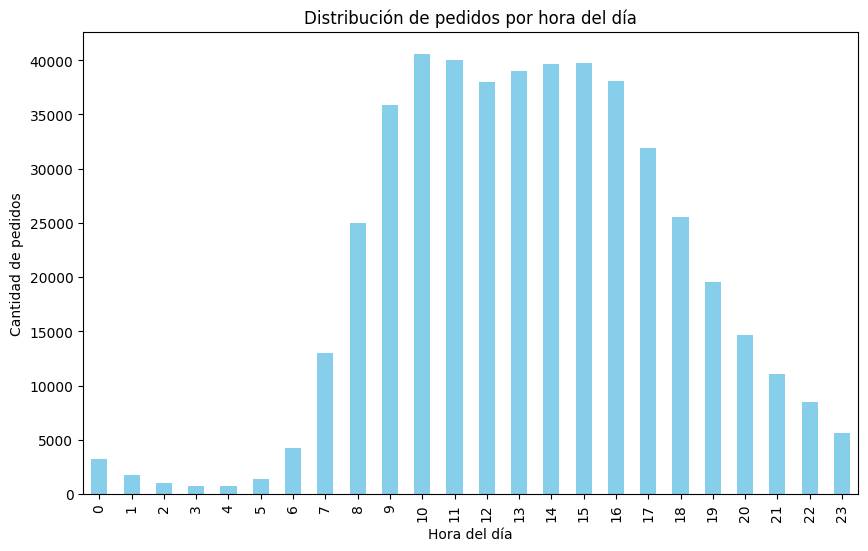

In [40]:
# Obtener la distribución de las horas del día en las que se realizan pedidos
order_hour_distribution = df_orders["order_hour_of_day"].value_counts()

# Ordenar las horas del día
order_hour_distribution_sorted = order_hour_distribution.sort_index()

# Crear el gráfico usando Pandas y personalizarlo
order_hour_distribution_sorted.plot(kind='bar', 
                                    figsize=(10, 6), 
                                    color='skyblue', 
                                    title='Distribución de pedidos por hora del día',
                                    xlabel='Hora del día', 
                                    ylabel='Cantidad de pedidos',
                                   )



Desde las 0 hasta las 6 de la mañana es cuando existen menos pedidos, mientras que de las 10 de la mañana a las 16 horas es cuando hay más pedidos.

### [A3] ¿Qué día de la semana compran víveres las personas?

<Axes: title={'center': 'Distribución de pedidos día de la semana'}, xlabel='Día de la semana', ylabel='Cantidad de pedidos'>

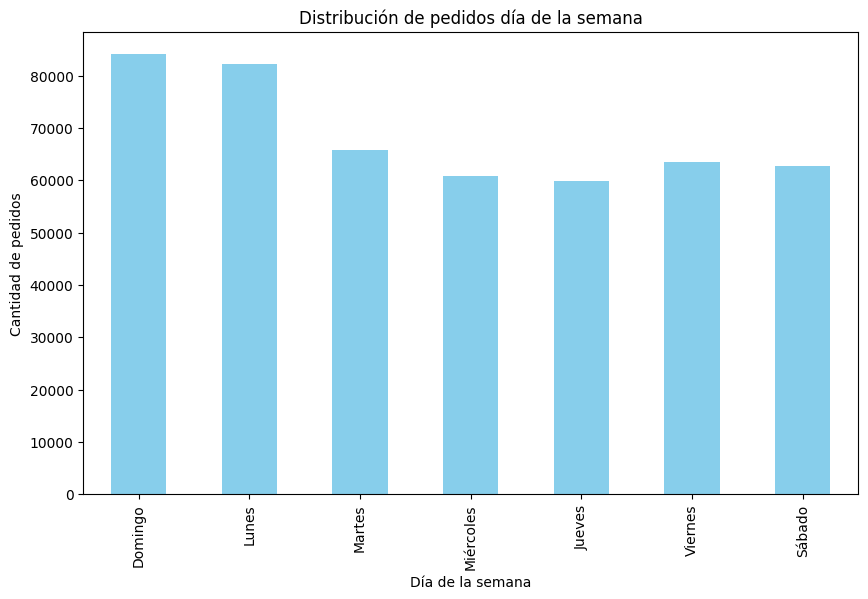

In [41]:
# Obtener la distribución de los días en los que se realizan pedidos
order_day_distribution = df_orders['order_dow'].value_counts()

# Ordenar los días de la semana
order_day_distribution = order_day_distribution.sort_index()

# Crear una lista de nombres de días en el orden deseado
dias_semana = ['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes','Sábado']

# Reemplazar los índices numéricos por los nombres de los días
order_day_distribution.index = dias_semana

# Crear el gráfico de la distribucion de pedidos por día
order_day_distribution.plot(kind='bar', 
                            figsize=(10, 6), 
                            color='skyblue', 
                            title='Distribución de pedidos día de la semana',
                            xlabel='Día de la semana',  
                            ylabel='Cantidad de pedidos')




Cuando las personas compran más es los domingos y los lunes; el resto de los días compran menos en comparación, siendo el jueves el día en que se compra menos.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? 

<Axes: title={'center': 'Distribución del Tiempo de Espera entre Pedidos (Excluyendo 30 días)'}, xlabel='Tiempo de espera', ylabel='Cantidad de pedidos'>

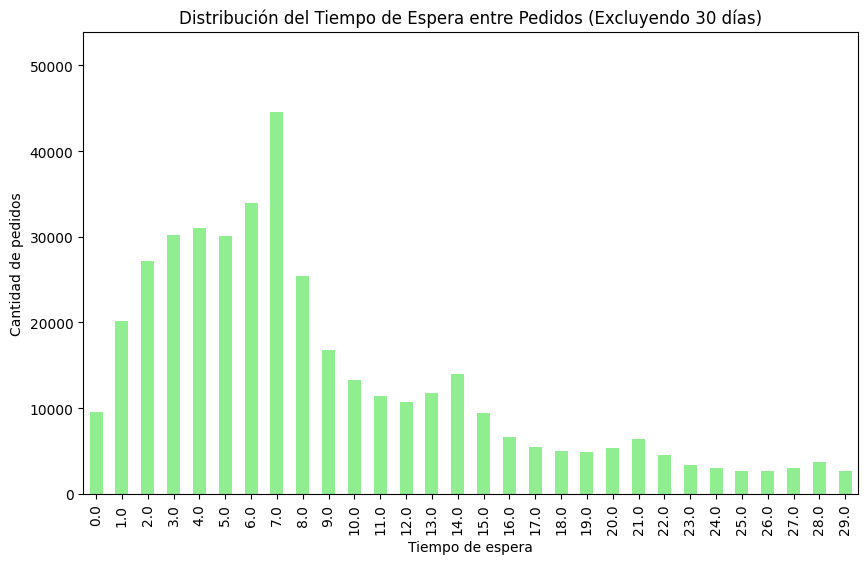

In [42]:
# Obtener la distribución de espera que tienen los clientes para realizar nuevos pedidos
waiting_order_again = df_orders["days_since_prior_order"].value_counts()

# Ordenar los tiempos de espera
waiting_order_again_sorted = waiting_order_again.sort_index()

# Crear el gráfico de la distribución de tiempos de espera
waiting_order_again_sorted.plot(kind='bar', 
                                figsize=(10, 6), 
                                color='skyblue', 
                                title='Distribución del Tiempo de Espera entre Pedidos',
                                xlabel='Tiempo de espera',  
                                ylabel='Cantidad de pedidos')

# Crear una gráfica adicional excluyendo los valores de 30 días
waiting_order_again_sorted[waiting_order_again_sorted.index != 30].plot(kind='bar', 
                                                                      figsize=(10, 6), 
                                                                      color='lightgreen', 
                                                                      title='Distribución del Tiempo de Espera entre Pedidos (Excluyendo 30 días)',
                                                                      xlabel='Tiempo de espera',  
                                                                      ylabel='Cantidad de pedidos')



Existe una tendencia a que las personas esperen muy poco para realizar un nuevo pedido, ya que la mayor cantidad de repeticiones ocurre en los primeros 7 días. En el período intermedio, los pedidos son reducidos.


# [B] 

1. Compararé las distribuciones de las horas de pedido ('order_hour_of_day') entre los miércoles y los sábados. Crearé gráficos de barras para cada día y los trazaré en la misma figura. Luego, describiré las diferencias que observe entre las distribuciones.

2. Generaré un gráfico que muestre la distribución del número de órdenes realizadas por los clientes. Esto me permitirá visualizar cuántos clientes hicieron 1 pedido, cuántos hicieron 2, cuántos hicieron 3, y así sucesivamente.

3. Identificaré los 20 productos más populares que se piden con mayor frecuencia. Mostraré tanto el ID del producto como su nombre en el gráfico.

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`.

In [43]:
# Filtrar las órdenes del día miércoles y agruparlas por hora dentro de la variable
wednesday_distribution_per_hour = df_orders.loc[df_orders["order_dow"] == 3].groupby("order_hour_of_day").size().reset_index(name='count')



In [44]:
# Filtrar las órdenes del día sábado y agruparlas por hora dentro de la variable
saturday_distribution_per_hour = df_orders.loc[df_orders["order_dow"] == 6].groupby("order_hour_of_day").size().reset_index(name='count')

In [45]:
#Combinar las órdenes de miércoles y sábado en un df a través del método merge y asignarlas a la variable
wed_and_sat_orders = wednesday_distribution_per_hour.merge(saturday_distribution_per_hour, on="order_hour_of_day", how='left', suffixes=("_wednesday_orders","_saturday_orders"))

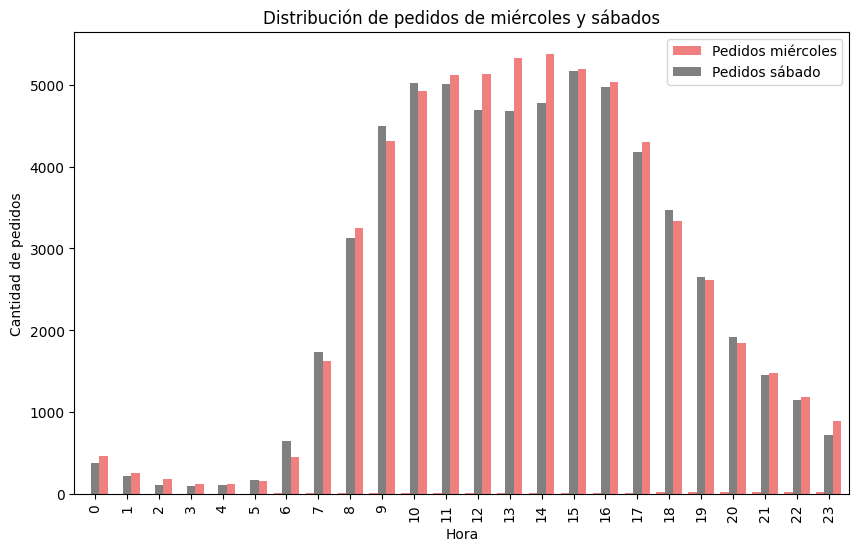

In [46]:
#Graficar la distribución de los días miércoles y sábado por hora
graph_wed_and_sat_orders = wed_and_sat_orders.plot(kind='bar', 
                             figsize=(10, 6), 
                              width=0.8,                      
                             color=['lightcoral', 'gray'],  
                             title='Distribución de pedidos de miércoles y sábados',
                             xlabel='Hora',  
                             ylabel='Cantidad de pedidos')

# Modificar la leyenda
graph_wed_and_sat_orders.legend(['Pedidos miércoles', 'Pedidos sábado'])




Los días miércoles y sábados tienen una distribución muy similar en cuanto a las distintas horas del día, con variaciones mínimas.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [47]:
df_orders["user_id"].value_counts()



user_id
149605    28
193164    26
78375     25
66664     24
134511    24
          ..
71501      1
187439     1
6845       1
176472     1
34561      1
Name: count, Length: 157437, dtype: int64

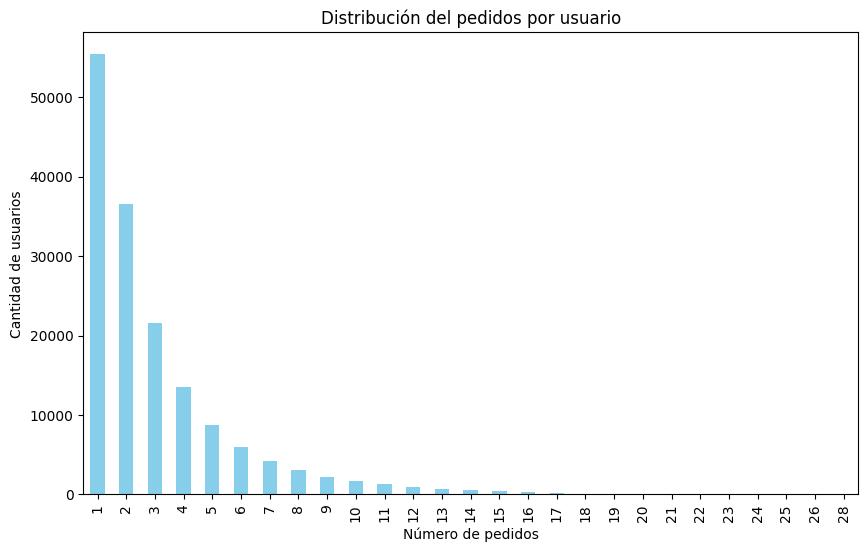

In [49]:
# Calcular la distribución del número de pedidos por usuario
orders_per_user = df_orders["user_id"].value_counts()

# Trazar el histograma
plt.figure(figsize=(10, 6))
orders_per_user.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribución del pedidos por usuario')
plt.xlabel('Número de pedidos')
plt.ylabel('Cantidad de usuarios')
plt.show()



La mayoría de las personas realizan solo unos pocos pedidos y a medida que aumenta el número de pedidos, disminuye el número de clientes.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [50]:
# Calcular la cuenta de ocurrencias de cada product_id en el DataFrame order_products
product_counts = df_order_products['product_id'].value_counts().reset_index()

# Renombrar la columna de cuenta
product_counts.columns = ['product_id', 'count']




In [51]:
# Fusionar con el DataFrame original para obtener los nombres de los productos
product_counts = product_counts.merge(df_products[['product_id', 'product_name']], on="product_id")

# Ordenar los resultados por la cuenta de ocurrencias en orden descendente
product_counts = product_counts.sort_values(by='count', ascending=False)

#Asignar los 20 productos más populares a most_pop_products
most_pop_products= product_counts.head(20)



<Axes: title={'center': 'Productos más populares'}, xlabel='Nombre del producto', ylabel='Número de veces compradas'>

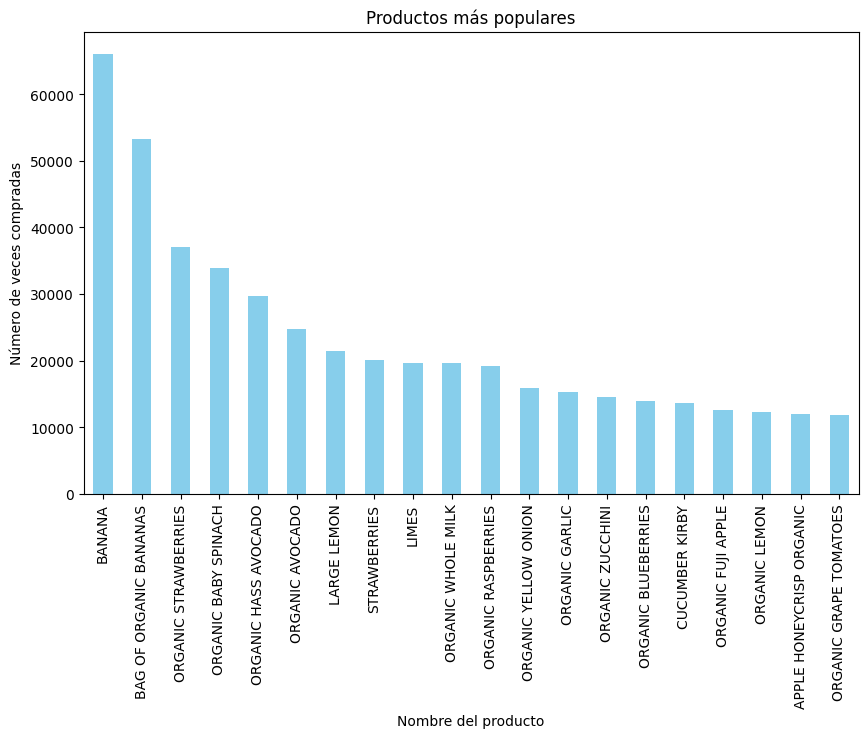

In [52]:
#Gráfico de los 20 productos que más se ordenan
most_pop_products.plot(kind='bar',
                       title='Productos más populares',
                       x='product_name', 
                       y='count', 
                       figsize=(10, 6), 
                       color='skyblue',
                       xlabel='Nombre del producto',
                       ylabel='Número de veces compradas',
                       legend=False
                      )



Los productos más populares son alimentos perecederos que se deterioran rápidamente. En primer lugar, tenemos el plátano.

# [C] 

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? 
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [53]:
# Calcular el máximo de "add_to_cart_order" por "order_id"
max_per_order = pd.pivot_table(df_order_products, index='order_id', values='add_to_cart_order', aggfunc='max')

max_per_order

,add_to_cart_order
order_id,
4,13.0
9,15.0
11,5.0
19,3.0
20,8.0
...,...
3421034,17.0
3421053,9.0
3421071,5.0


In [54]:
#Contar el número de pedidos con un determinado número de productos y ordenar por index
max_per_order =max_per_order.value_counts().sort_index()

#Convertir en Data frame
max_per_order_df = max_per_order.to_frame(name='number_of_orders')

#Convertir add_to_cart_order en columna y añadir índices
max_per_order_df.reset_index(inplace=True, drop=False)


#Convertir los datos de la columna con el número de artículos a enteros
max_per_order_df['add_to_cart_order'] = max_per_order_df['add_to_cart_order'].astype(int)


#Llamar al Data Frame
max_per_order_df




,add_to_cart_order,number_of_orders
0,1,21847
1,2,26292
2,3,29046
3,4,31054
4,5,31923
...,...,...
59,60,13
60,61,16
61,62,11
62,63,12


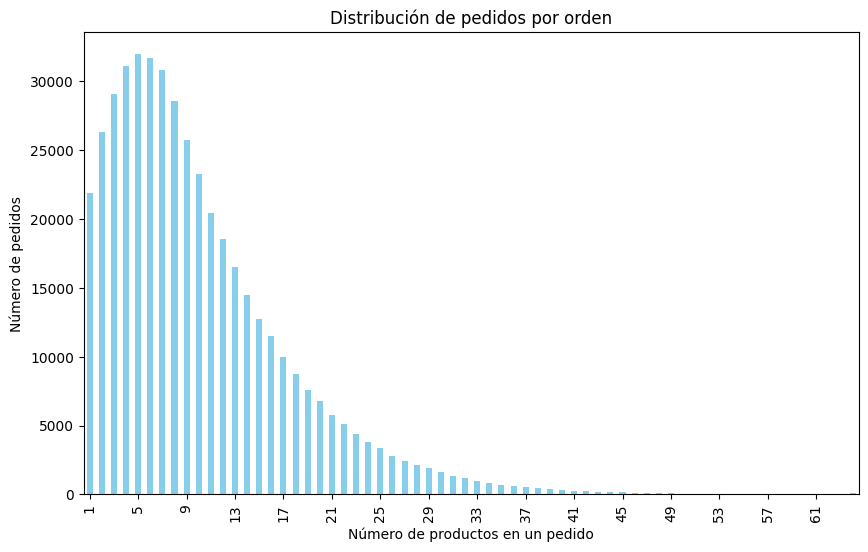

In [55]:
# Graficar
x = max_per_order_df.plot(kind='bar',
                      x= "add_to_cart_order",
                      y="number_of_orders",
                      title='Distribución de pedidos por orden',
                      xlabel='Número de productos en un pedido',
                      ylabel='Número de pedidos',
                      legend=None,
                      figsize=(10, 6),
                      color='skyblue')

#
plt.xticks(range(0, 64, 4))

#Mostrar únicamente el gráfico
plt.show()



La mayoría de las personas compran pocos productos en cada pedido, siendo la mayor cantidad de pedidos de 5 productos. A partir de ahí, el número de productos por pedido va disminuyendo gradualmente, hasta que los pedidos de 40 productos o más son prácticamente inexistentes.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [56]:
#Agrupar los productos por id y las veces que fueron comprados
times_reordered_products = df_order_products.groupby("product_id")["reordered"].sum()

#Convertirlo en un DataFrame
df_times_reordered_products = pd.DataFrame(times_reordered_products).reset_index()

df_times_reordered_products 

,product_id,reordered
0,1,158
1,2,0
2,3,31
3,4,25
4,7,1
...,...,...
45568,49690,4
45569,49691,31
45570,49692,5
45571,49693,11


In [57]:
#Ordenar los productos por el número de veces que fueron vueltos a ordenar y reasignar
reordered_products_sorted = df_times_reordered_products.sort_values(by="reordered",ascending=False)




In [58]:
#Combinar los ids de los productos con sus respectivos nombres  

reorders_per_product = reordered_products_sorted.merge(df_products, on='product_id', how='left')

# mostrar los 20 productos que más veces han sido vueltos a ordenar

twenty_pop_products = reorders_per_product.head(20)

#Llamar al DataFrame
twenty_pop_products

,product_id,reordered,product_name,aisle_id,department_id
0,24852,55763,BANANA,24,4
1,13176,44450,BAG OF ORGANIC BANANAS,24,4
2,21137,28639,ORGANIC STRAWBERRIES,24,4
3,21903,26233,ORGANIC BABY SPINACH,123,4
4,47209,23629,ORGANIC HASS AVOCADO,24,4
5,47766,18743,ORGANIC AVOCADO,24,4
6,27845,16251,ORGANIC WHOLE MILK,84,16
7,47626,15044,LARGE LEMON,24,4
8,27966,14748,ORGANIC RASPBERRIES,123,4
9,16797,13945,STRAWBERRIES,24,4


<Axes: title={'center': 'Productos con Repetición en Pedidos'}, xlabel='producto', ylabel='Recurrencia en Pedidos de Productos'>

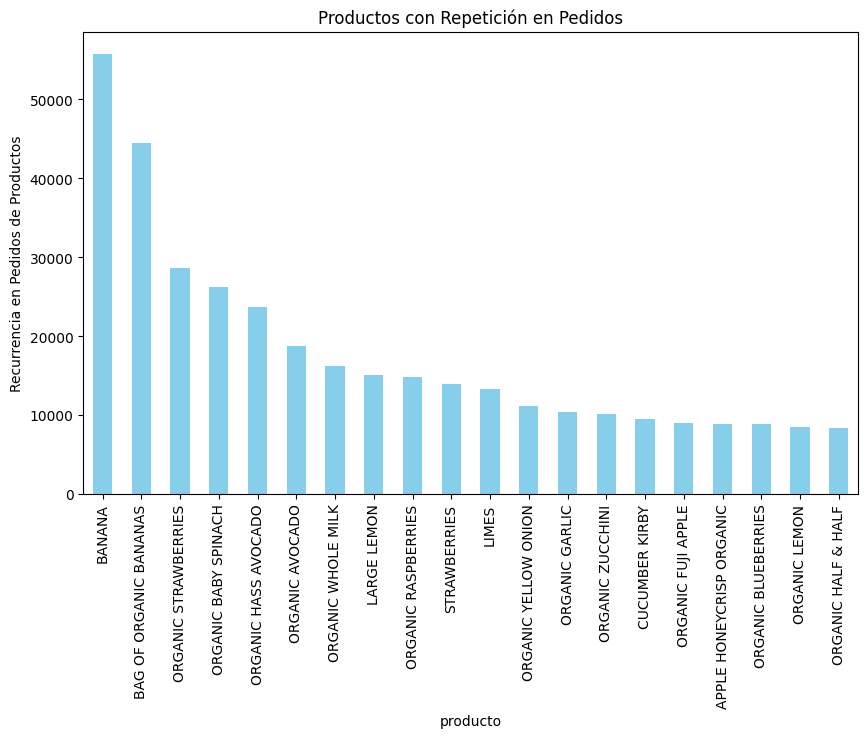

In [59]:
#Graficar los 20 productos con más repetición en pedidos
twenty_pop_products.plot(kind='bar',
                               x= "product_name",
                               y="reordered",
                               title='Productos con Repetición en Pedidos',
                               xlabel='producto',
                               ylabel='Recurrencia en Pedidos de Productos',
                               legend=None,
                               figsize=(10, 6),
                               color='skyblue')


Varios de los 20 productos con mayor recurrencia en los pedidos coinciden con los 20 productos más populares, lo que sugiere una consistencia en las preferencias de los clientes

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [60]:
#Calcular el total de recompras (reorders)
total_reorders = reorders_per_product['reordered'].sum()

In [61]:
#Crear una columna con la porporción en que un producto se vuelve a pedir
reorders_per_product['reorder_proportion'] = reorders_per_product['reordered'] / total_reorders

In [62]:
reorders_per_product

,product_id,reordered,product_name,aisle_id,department_id,reorder_proportion
0,24852,55763,BANANA,24,4,0.020777
1,13176,44450,BAG OF ORGANIC BANANAS,24,4,0.016562
2,21137,28639,ORGANIC STRAWBERRIES,24,4,0.010671
3,21903,26233,ORGANIC BABY SPINACH,123,4,0.009774
4,47209,23629,ORGANIC HASS AVOCADO,24,4,0.008804
...,...,...,...,...,...,...
45568,37593,0,MEDICATED CALAMINE LOTION,118,11,0.000000
45569,14775,0,FRESHBURST® ANTISEPTIC ADULT MOUTHWASH,20,11,0.000000
45570,37596,0,SHREDDED CHICKEN & CHICKEN LIVER RECIPE,41,8,0.000000
45571,14774,0,READY RICE RED BEANS & RICE,4,9,0.000000


Conclusiones:

Hay productos con una proporción bastante alta en comparación con el resto, como las bananas, lo cual muestra fidelidad del cliente. Sin embargo, también hay múltiples productos que no se han vuelto a comprar.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [63]:
#Combinar df_orders y df_order_products
merged_data = pd.merge(df_orders, df_order_products, on='order_id')

# Calcular el número total de productos pedidos por cada cliente
total_products_per_user = merged_data.groupby('user_id')['product_id'].nunique()

# Calcular el número de productos pedidos nuevamente por cada cliente
reordered_products_per_user = merged_data.groupby(['user_id', 'reordered'])['product_id'].count().unstack().fillna(0)


reordered_products_per_user = reordered_products_per_user[1]  # Seleccionar solo los productos pedidos nuevamente

# Calcular la proporción de productos pedidos nuevamente por cada cliente
proportion_reordered_per_user = reordered_products_per_user / total_products_per_user






In [64]:
#Mostrar estadísticas descriptivas
proportion_reordered_per_user.describe()

count    149626.000000
mean          0.649570
std           0.515156
min           0.000000
25%           0.285714
50%           0.585366
75%           0.931034
max          12.000000
dtype: float64

La mayoría de los clientes tienden a reordenar una proporción significativa de los productos que han pedido anteriormente, pero también hay una gran variabilidad en esta proporción entre los clientes. Es importante investigar más a fondo los valores extremos


### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [65]:
# Filtrar los productos que se agregaron primero al carrito (add_to_cart_order == 1)
first_in_cart = df_order_products[df_order_products['add_to_cart_order'] == 1]

# Contar la frecuencia de cada producto como primer artículo en el carrito
top_first_in_cart = first_in_cart['product_id'].value_counts().reset_index()


#Renombrar las columnas
top_first_in_cart.columns = ['product_id', 'frequency']

In [66]:
#Combinar top_first_in_cart con df_products por el id
top_first_in_cart = pd.merge(top_first_in_cart, df_products, on='product_id')



In [67]:
# Seleccionar los 20 principales artículos
top_20_first_in_cart = top_first_in_cart.head(20)

top_20_first_in_cart

,product_id,frequency,product_name,aisle_id,department_id
0,24852,15562,BANANA,24,4
1,13176,11026,BAG OF ORGANIC BANANAS,24,4
2,27845,4363,ORGANIC WHOLE MILK,84,16
3,21137,3946,ORGANIC STRAWBERRIES,24,4
4,47209,3390,ORGANIC HASS AVOCADO,24,4
5,21903,3336,ORGANIC BABY SPINACH,123,4
6,47766,3044,ORGANIC AVOCADO,24,4
7,19660,2336,SPRING WATER,115,7
8,16797,2308,STRAWBERRIES,24,4
9,27966,2024,ORGANIC RASPBERRIES,123,4



Los 20 productos principales que las personas ponen primero en el carrito pertenecen todos a los departamentos 4, 7 y 16.

### Conclusión general del proyecto:

En conclusión, el proyecto revela varias tendencias importantes en el comportamiento de compra de los clientes a través del análisis de datos sensibles. Se observa que el horario de compra varía a lo largo del día, con picos en las horas centrales, y los días de la semana influyen en la frecuencia de compra, siendo los domingos y lunes los más activos.

Además, se destaca la preferencia por realizar pedidos con una frecuencia relativamente alta, con intervalos cortos entre compras. Los productos perecederos, como los plátanos, son populares entre los clientes, y la mayoría tiende a comprar una cantidad moderada de productos por pedido. La repetición de productos en los pedidos sugiere una consistencia en las preferencias de los clientes, aunque también se observa variabilidad en la fidelidad del cliente y en la proporción de productos que se vuelven a comprar.

La concentración de los 20 principales productos en los departamentos 4, 7 y 16 indica la relevancia de estos departamentos en las compras iniciales de los clientes. Sin embargo, para comprender mejor estos comportamientos, se requiere una investigación adicional, especialmente en los casos extremos de reordenamiento de productos y fidelidad del cliente.